# Contributors:
1) Shrey Shah: https://github.com/shreycshah
2) Tannavi Snehal: https://github.com/Tannavi-Snehal
3) Gautam Singh: https://github.com/ggs597

Go through README.md for the overview of the hackathon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading and analysing dataset

In [2]:
data=pd.read_csv(r'Train.csv')
test=pd.read_csv(r'Test.csv')
test.drop(columns=['price'],axis=1,inplace=True)
data.shape,test.shape

((13320, 9), (1480, 8))

In [3]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
test.isnull().sum()

area_type         0
availability      0
location          0
size              2
society         626
total_sqft        0
bath              7
balcony          69
dtype: int64

# Handling 'availability' column

In [5]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [6]:
data['availability']=np.where(data['availability'].str.contains('Ready To Move'),str(13),
                     np.where( data['availability'].str.contains('Immediate Possession'),str(14),
                        data.availability.apply(lambda x:x[3:])
                        ))
data.head()

test['availability']=np.where(test['availability'].str.contains('Ready To Move'),str(13),
                     np.where( test['availability'].str.contains('Immediate Possession'),str(14),
                        test.availability.apply(lambda x:x[3:])
                        ))

print(data['availability'].unique())

#later on we will encode the availability column
data.head()

['Dec' '13' 'May' 'Feb' 'Nov' 'Oct' 'Sep' 'Mar' 'Apr' 'Aug' 'Jun' 'Jan'
 'Jul' '14']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,13,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,13,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,13,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,13,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Handling 'size' columns

In [7]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
data['size']=data['size'].fillna(data['size'].mode()[0])
data['size']=data['size'].str.extract('(\d+)')
data['size']=data['size'].astype('float')

test['size']=test['size'].fillna('2.0')
test['size']=test['size'].str.extract('(\d+)')
test['size']=test['size'].astype('float')

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,13,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,13,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,13,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,13,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


# Handling 'bath', 'balcony' & 'location' columns

In [9]:
data['bath']=data['bath'].fillna(data['bath'].median())
data['balcony']=data['balcony'].fillna(data['balcony'].median())
data['location']=data['location'].fillna(data['location'].mode()[0])

test['bath']=test['bath'].fillna(data['bath'].median())
test['balcony']=test['balcony'].fillna(data['balcony'].median())
test['location']=test['location'].fillna(data['location'].mode()[0])

# Handling 'total_sqft' column

In [10]:
import re
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

data['total_sqft'] = data.total_sqft.str.split('-').apply(preprocess_total_sqft)
test['total_sqft'] = test.total_sqft.str.split('-').apply(preprocess_total_sqft)

# Target Encoding for categorical columns

In [11]:
area_type_Encoding=data.groupby('area_type')['price'].mean()
data['area_type']=data['area_type'].map(area_type_Encoding)
test['area_type']=test['area_type'].map(area_type_Encoding)

location_Encoding=data.groupby('location')['price'].mean()
data['location']=data['location'].map(location_Encoding)
test['location']=test['location'].map(location_Encoding)

availability_Encoding=data.groupby('availability')['price'].mean()
data['availability']=data['availability'].map(availability_Encoding)
test['availability']=test['availability'].map(availability_Encoding)

data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,92.971757,95.154464,48.316667,2.0,Coomee,1056.0,2.0,1.0,39.07
1,208.495486,115.179137,115.015882,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,104.285498,115.179137,61.252527,3.0,NaN,1440.0,2.0,3.0,62.00
3,92.971757,115.179137,115.348261,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,92.971757,115.179137,95.630303,2.0,NaN,1200.0,2.0,1.0,51.00


# Outlier Handling in price and total_sqft using z-score

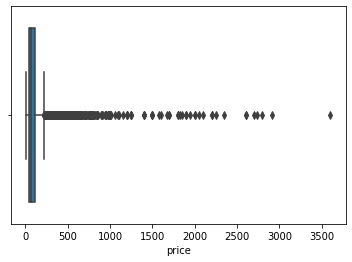

In [12]:
sns.boxplot(data['price'])

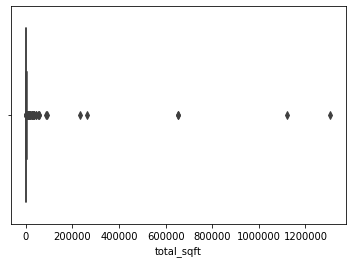

In [13]:
sns.boxplot(data['total_sqft'])

In [14]:
from scipy import stats
data['z_score_price'] = np.abs(stats.zscore(data['price']))
data['z_score_sqft']=np.abs(stats.zscore(data['total_sqft']))
data=data[data['z_score_price']<=3]
data=data[data['z_score_sqft']<=3]
data.drop(columns=['z_score_price','z_score_sqft'],axis=1,inplace=True)
data.shape

(13118, 9)

# Feature Engineering

In [15]:
data['price']=data['price']*100000

In [16]:
lookup=data.groupby(['location','society'])['price'].agg(['mean']).reset_index()
lookup=lookup.rename(columns={'mean':'location_society_mean'})
data=pd.merge(data,lookup,how='left',left_on=['location','society'],right_on=['location','society'])
test=pd.merge(test,lookup,how='left',left_on=['location','society'],right_on=['location','society'])
lookup

,location,society,location_society_mean
0,20.000000,Ardaseo,2000000.0
1,22.000000,Jaensa,2200000.0
2,22.890000,Rosha I,2289000.0
3,23.250000,GMown E,2325000.0
4,23.900000,AsNowre,2390000.0
...,...,...,...
2707,824.384615,Lelia M,50100000.0
2708,1068.000000,CoDast,53600000.0
2709,1093.388889,Saensar,6000000.0
2710,1167.714286,Inshath,17200000.0


In [17]:
lookup1=data.groupby(['society','size'])['price'].agg(['mean']).reset_index()
lookup1=lookup1.rename(columns={'mean':'society_size_mean'})
data=pd.merge(data,lookup1,how='left',left_on=['size','society'],right_on=['size','society'])
test=pd.merge(test,lookup1,how='left',left_on=['size','society'],right_on=['size','society'])
lookup1

,society,size,society_size_mean
0,3Codeli,2.0,5850000.0
1,7 ise P,3.0,5000000.0
2,A idse,2.0,5000000.0
3,A rtsai,3.0,7300000.0
4,ACersd,2.0,11500000.0
...,...,...,...
3469,Zostaa,2.0,6200000.0
3470,i1ncyRe,2.0,5000000.0
3471,i1odsne,2.0,4000000.0
3472,i1rtsCo,2.0,6000000.0


In [18]:
lookup2=data.groupby(['area_type','size'])['price'].agg(['mean']).reset_index()
lookup2=lookup2.rename(columns={'mean':'area_size_mean'})
data=pd.merge(data,lookup2,how='left',left_on=['area_type','size'],right_on=['area_type','size'])
test=pd.merge(test,lookup2,how='left',left_on=['area_type','size'],right_on=['area_type','size'])
lookup2

,area_type,size,area_size_mean
0,89.502356,1.0,4.388583e+06
1,89.502356,2.0,5.766750e+06
2,89.502356,3.0,1.056037e+07
3,89.502356,4.0,1.465714e+07
4,89.502356,5.0,2.400000e+07
5,89.502356,6.0,1.300000e+07
6,89.502356,7.0,1.000000e+07
7,89.502356,8.0,1.450000e+07
8,89.502356,9.0,5.000000e+07
9,92.971757,1.0,3.617052e+06


In [19]:
lookup3=data.groupby(['bath','balcony'])['price'].agg(['mean']).reset_index()
lookup3=lookup3.rename(columns={'mean':'bath_balcony_mean'})
data=pd.merge(data,lookup3,how='left',left_on=['bath','balcony'],right_on=['bath','balcony'])
test=pd.merge(test,lookup3,how='left',left_on=['bath','balcony'],right_on=['bath','balcony'])
lookup3

,bath,balcony,bath_balcony_mean
0,1.0,0.0,5.451671e+06
1,1.0,1.0,4.062512e+06
2,1.0,2.0,4.630978e+06
3,1.0,3.0,2.187500e+07
4,2.0,0.0,7.627339e+06
5,2.0,1.0,6.198492e+06
6,2.0,2.0,6.366311e+06
7,2.0,3.0,6.648859e+06
8,3.0,0.0,1.294917e+07
9,3.0,1.0,1.183400e+07


In [20]:
lookup4=data.groupby(['bath','size'])['price'].agg(['mean']).reset_index()
lookup4=lookup4.rename(columns={'mean':'bath_size_mean'})
data=pd.merge(data,lookup4,how='left',left_on=['bath','size'],right_on=['bath','size'])
test=pd.merge(test,lookup4,how='left',left_on=['bath','size'],right_on=['bath','size'])
lookup4

,bath,size,bath_size_mean
0,1.0,1.0,4.196344e+06
1,1.0,2.0,5.785097e+06
2,1.0,3.0,8.700000e+06
3,1.0,4.0,3.500000e+06
4,2.0,1.0,4.624681e+06
...,...,...,...
71,15.0,14.0,1.250000e+07
72,16.0,16.0,5.500000e+07
73,16.0,19.0,4.900000e+07
74,18.0,18.0,2.000000e+07


In [21]:
lookup5=data.groupby(['size','balcony'])['price'].agg(['mean']).reset_index()
lookup5=lookup5.rename(columns={'mean':'size_balcony_mean'})
data=pd.merge(data,lookup5,how='left',left_on=['size','balcony'],right_on=['size','balcony'])
test=pd.merge(test,lookup5,how='left',left_on=['size','balcony'],right_on=['size','balcony'])
lookup5

,size,balcony,size_balcony_mean
0,1.0,0.0,4.732824e+06
1,1.0,1.0,3.886917e+06
2,1.0,2.0,3.965698e+06
3,1.0,3.0,3.600000e+07
4,2.0,0.0,7.171809e+06
5,2.0,1.0,5.779343e+06
6,2.0,2.0,5.926161e+06
7,2.0,3.0,6.281692e+06
8,3.0,0.0,1.169989e+07
9,3.0,1.0,1.006378e+07


In [22]:
lookup6=data.groupby(['availability','society'])['price'].agg(['mean']).reset_index()
lookup6=lookup6.rename(columns={'mean':'availability_society_mean'})
data=pd.merge(data,lookup6,how='left',left_on=['availability','society'],right_on=['availability','society'])
test=pd.merge(test,lookup6,how='left',left_on=['availability','society'],right_on=['availability','society'])
lookup6

,availability,society,availability_society_mean
0,70.045221,ARngsd,3.895000e+06
1,70.045221,Ahciace,4.933333e+06
2,70.045221,Aroomba,1.004600e+07
3,70.045221,AsNowre,3.495000e+06
4,70.045221,BMineis,5.093500e+06
...,...,...,...
3144,194.345873,Sosisic,1.300000e+07
3145,194.345873,SuVue S,3.152500e+06
3146,194.345873,Suhamra,5.600000e+06
3147,194.345873,TiaksAa,8.505000e+06


In [23]:
lookup7=data.groupby(['area_type','society'])['price'].agg(['mean']).reset_index()
lookup7=lookup7.rename(columns={'mean':'area_society_mean'})
data=pd.merge(data,lookup7,how='left',left_on=['area_type','society'],right_on=['area_type','society'])
test=pd.merge(test,lookup7,how='left',left_on=['area_type','society'],right_on=['area_type','society'])
lookup7

,area_type,society,area_society_mean
0,89.502356,Advash,9.200000e+06
1,89.502356,AnaveEn,4.300000e+06
2,89.502356,Arcia S,5.291667e+06
3,89.502356,Baveles,8.800000e+06
4,89.502356,CharkR,5.500000e+06
...,...,...,...
3146,208.495486,Vahid O,1.975000e+07
3147,208.495486,ValleCi,1.920000e+07
3148,208.495486,Vastael,2.000000e+07
3149,208.495486,Vetanan,1.800000e+07


In [24]:
data['price_per_sqft']=data['price']/data['total_sqft']
price_per_sqft_area_wise=data.groupby('area_type')['price_per_sqft'].mean()
data['price_per_sqft_area_wise']=data['area_type'].map(price_per_sqft_area_wise)
data.drop(['price_per_sqft'],axis=1,inplace=True)
test['price_per_sqft_area_wise']=test['area_type'].map(price_per_sqft_area_wise)

In [25]:
data['price']=data['price']/100000

In [26]:
data.drop(columns=['society'],axis=1,inplace=True)
test.drop(columns=['society'],axis=1,inplace=True)

In [27]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,location_society_mean,society_size_mean,area_size_mean,bath_balcony_mean,bath_size_mean,size_balcony_mean,availability_society_mean,area_society_mean,price_per_sqft_area_wise
0,92.971757,95.154464,48.316667,2.0,1056.0,2.0,1.0,39.07,5.381000e+06,5.414500e+06,5.797035e+06,6.198492e+06,5.907150e+06,5.779343e+06,3.907000e+06,5.381000e+06,5575.035958
1,208.495486,115.179137,115.015882,4.0,2600.0,5.0,3.0,120.00,1.216154e+07,1.251111e+07,2.038315e+07,2.462584e+07,2.580630e+07,2.489664e+07,1.167778e+07,1.235000e+07,17873.335733
2,104.285498,115.179137,61.252527,3.0,1440.0,2.0,3.0,62.00,NaN,NaN,1.066265e+07,6.648859e+06,7.372617e+06,1.089977e+07,NaN,NaN,7214.517668
3,92.971757,115.179137,115.348261,3.0,1521.0,3.0,1.0,95.00,1.168955e+07,1.107737e+07,1.029019e+07,1.183400e+07,1.159948e+07,1.006378e+07,1.168955e+07,1.168955e+07,5575.035958
4,92.971757,115.179137,95.630303,2.0,1200.0,2.0,1.0,51.00,NaN,NaN,5.797035e+06,6.198492e+06,5.907150e+06,5.779343e+06,NaN,NaN,5575.035958


# Train Validation Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(
    data.drop(columns=['price']), data['price'], test_size=0.2, random_state=2)

X_train.shape, X_validation.shape

((10494, 16), (2624, 16))

# Feature Selection

In [29]:
features=['area_type','availability', 'location', 'size', 'total_sqft', 'bath', 'balcony', 'society_size_mean', 
           'area_size_mean', 'price_per_sqft_area_wise','bath_balcony_mean','bath_size_mean',
          'size_balcony_mean','availability_society_mean','area_society_mean']

# Training Model

In [30]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=2)
xgb.fit(X_train[features],y_train)
y_pred_xgb=xgb.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_xgb +1) - np.log(y_validation +1)).mean()) 
score

0.7719954898683112

In [31]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(random_state=2)
lgb.fit(X_train[features],y_train)
y_pred_lgb=lgb.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_lgb +1) - np.log(y_validation +1)).mean()) 
score

0.766242063188415

In [32]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=100,logging_level='Silent')
cat.fit(X_train[features],y_train)
y_pred_cat=cat.predict(X_validation[features])
score=1-np.sqrt(np.square(np.log(y_pred_cat +1) - np.log(y_validation +1)).mean()) 
score

0.7671551001251476

In [33]:
from sklearn.ensemble import VotingRegressor

xgb = XGBRegressor(random_state=6,learning_rate=0.025, n_estimators=500,max_depth=8)
lgb =  LGBMRegressor(boosting_type='dart', learning_rate=0.2, max_depth=6,n_estimators=350, num_leaves=45, random_state=0)
cat = CatBoostRegressor(random_state=100,logging_level='Silent',l2_leaf_reg=2,learning_rate=0.01,iterations=1200,depth=6)

vr = VotingRegressor([('xgb', xgb), ('lgb', lgb),('cat', cat)])

y_pred_vr=vr.fit(X_train[features], y_train).predict(X_validation[features])

score=1-np.sqrt(np.square(np.log(y_pred_vr +1) - np.log(y_validation +1)).mean()) 
score

0.7723925160098289

# Final Prediction

In [34]:
y_final_test=vr.predict(test[features])

In [35]:
subm=pd.DataFrame({'price':y_final_test})
subm[subm['price']<0]

,price


In [36]:
#subm.to_csv('best.csv',index=False) 

In [37]:
# import pickle
# pickle.dump(vr,open('model.pkl','wb'))